# Analysis of OULAD

##### In this notebook, we have merged, analyzed, and performed operations on the studentAssessment.csv and studentInfo.csv datasets from Open University Learning Analytics Dataset (OULAD).

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
st_assess = pd.read_csv("OULAD/studentAssessment.csv")
st_info = pd.read_csv("OULAD/studentInfo.csv")

In [3]:
st_merge = pd.merge(st_assess, st_info, on = "id_student")
st_merge = st_merge[(st_merge["highest_education"] != "No Formal quals") & 
                    (st_merge["highest_education"] != "Post Graduate Qualification")]

st_merge["Passed"] = st_merge["final_result"] == "Pass"

st_merge = st_merge[((st_merge["score"] >= 40) & (st_merge["Passed"]==True)) | 
                    ((st_merge["score"] < 40) & (st_merge["Passed"]==False))]

query_imd = re.compile(r"([0-9]+)-.+")
st_merge["imd_band"] = st_merge["imd_band"].str.extract(query_imd).astype(float)
st_merge["Economic Status"] = st_merge["imd_band"] < 50.00

st_merge = st_merge[st_merge["age_band"] == "0-35"]
st_merge.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,Passed,Economic Status
15,1752,32885,26,0,69.0,AAA,2013J,F,West Midlands Region,Lower Than A Level,50.0,0-35,0,60,N,Pass,True,False
17,1754,32885,124,0,63.0,AAA,2013J,F,West Midlands Region,Lower Than A Level,50.0,0-35,0,60,N,Pass,True,False
19,1756,32885,222,0,75.0,AAA,2013J,F,West Midlands Region,Lower Than A Level,50.0,0-35,0,60,N,Pass,True,False
25,1752,45462,20,0,70.0,AAA,2013J,M,Scotland,HE Qualification,30.0,0-35,0,60,N,Pass,True,True
26,1753,45462,54,0,65.0,AAA,2013J,M,Scotland,HE Qualification,30.0,0-35,0,60,N,Pass,True,True


In [4]:
print(st_merge.shape)
print(st_merge.describe())

(83017, 18)
       id_assessment    id_student  date_submitted     is_banked  \
count   83017.000000  8.301700e+04    83017.000000  83017.000000   
mean    26989.613248  6.332216e+05      123.835383      0.004698   
std      8282.210604  4.520646e+05       71.509893      0.068380   
min      1752.000000  2.369800e+04       -8.000000      0.000000   
25%     24286.000000  5.065040e+05       56.000000      0.000000   
50%     25361.000000  5.808450e+05      125.000000      0.000000   
75%     34881.000000  6.280040e+05      189.000000      0.000000   
max     37443.000000  2.698535e+06      594.000000      1.000000   

              score      imd_band  num_of_prev_attempts  studied_credits  
count  83017.000000  79866.000000          83017.000000     83017.000000  
mean      74.294494     43.988931              0.137032        78.546563  
std       18.954507     28.186979              0.428674        36.869140  
min        0.000000      0.000000              0.000000        30.000000  


In [5]:
st_merge.to_csv('merged_info_assess.csv', index=False)

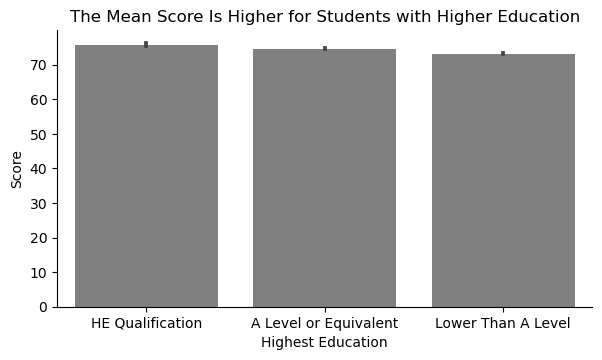

In [6]:
ed_comp = sns.catplot(data=st_merge, x="highest_education", y="score", kind="bar", aspect = 1.75, height = 3.5,
                      order=["HE Qualification", "A Level or Equivalent", "Lower Than A Level"],
                      color="gray")
ed_comp.set(ylabel="Score")
ed_comp.set(xlabel="Highest Education")
plt.title("The Mean Score Is Higher for Students with Higher Education")
plt.show()

In [7]:
he_score = st_merge[st_merge["highest_education"]=="HE Qualification"]["score"]
n_he = len(he_score)
sd_he = np.std(he_score)

al_score = st_merge[st_merge["highest_education"]=="A Level or Equivalent"]["score"]
n_al = len(al_score)
sd_al = np.std(al_score)

lo_score = st_merge[st_merge["highest_education"]=="Lower Than A Level"]["score"]
n_lo = len(lo_score)
sd_lo = np.std(lo_score)

ed_p1 = stats.ttest_ind(he_score, al_score, equal_var=False)[1]
ed_p2 = stats.ttest_ind(al_score, lo_score, equal_var=False)[1]

print("p-value for HE Qual and A Level or Equivalent: ", ed_p1)
print("p-value for A Level and Lower Than A Level: ", ed_p2)

heal_mean_diff = np.mean(he_score) - np.mean(al_score)
heal_sd_pooled = np.sqrt(((n_he-1)*(sd_he**2) + (n_al-1)*(sd_al**2)) / (n_he+n_al-2))

heal_d = heal_mean_diff / heal_sd_pooled

allo_mean_diff = np.mean(al_score) - np.mean(lo_score)
allo_sd_pooled = np.sqrt(((n_al-1)*(sd_al**2) + (n_lo-1)*(sd_lo**2)) / (n_al+n_lo-2))

allo_d = allo_mean_diff / allo_sd_pooled


print("Cohen's d-score for HE Qual and A Level or Equivalent: ", heal_d)
print("Cohen's d-score for HE Qual and A Level or Equivalent: ", allo_d)

p-value for HE Qual and A Level or Equivalent:  4.3684804547454956e-10
p-value for A Level and Lower Than A Level:  5.515709832487307e-22
Cohen's d-score for HE Qual and A Level or Equivalent:  0.0654196034758702
Cohen's d-score for HE Qual and A Level or Equivalent:  0.07431276999941928


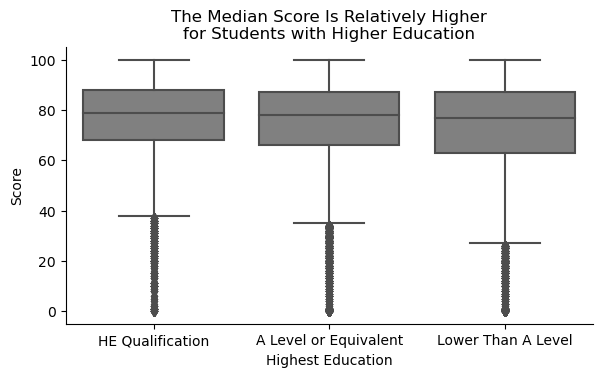

In [8]:
ed_box = sns.catplot(data=st_merge, x='highest_education', y='score', kind='box', aspect = 1.75,
                     height = 3.5, order=["HE Qualification", "A Level or Equivalent", "Lower Than A Level"], color="gray")
ed_box.set(ylabel="Score")
ed_box.set(xlabel="Highest Education")
plt.title("The Median Score Is Relatively Higher\nfor Students with Higher Education")
plt.show()

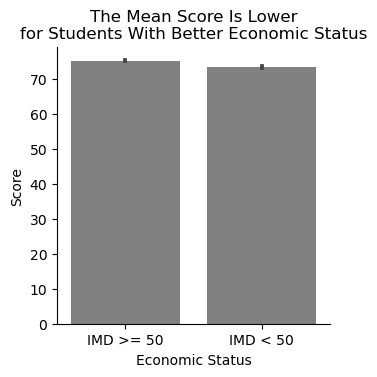

In [9]:
econ_comp = sns.catplot(data=st_merge, x="Economic Status", y="score", kind="bar", aspect = 1, height = 3.5, color="gray")
econ_comp.set(ylabel="Score")
econ_comp.set_xticklabels(["IMD >= 50", "IMD < 50"])
plt.title("The Mean Score Is Lower\nfor Students With Better Economic Status")
plt.show()

In [10]:
poor_score = st_merge[st_merge["Economic Status"]==False]["score"]
n_poor = len(poor_score)
sd_poor = np.std(poor_score)

rich_score = st_merge[st_merge["Economic Status"]==True]["score"]
n_rich = len(rich_score)
sd_rich = np.std(rich_score)

econ_p = stats.ttest_ind(poor_score, rich_score, equal_var=False)[1]
print("p-value for economic difference in percentage of students who passed: ", econ_p)

wel_mean_diff = np.mean(poor_score) - np.mean(rich_score)
wel_sd_pooled = np.sqrt(((n_rich-1)*(sd_rich**2) + (n_poor-1)*(sd_poor**2)) / (n_rich+n_poor-2))

wel_d = wel_mean_diff / wel_sd_pooled

print("Cohen's d-score for economic difference in percentage of students who passed: ", wel_d)

p-value for economic difference in percentage of students who passed:  1.3686795505764027e-40
Cohen's d-score for economic difference in percentage of students who passed:  0.09263639233153799


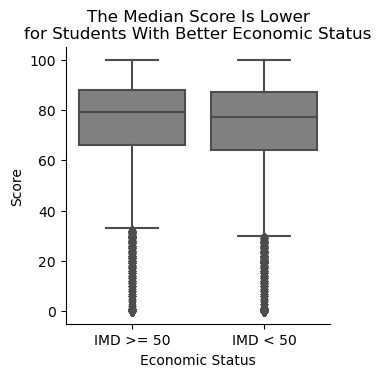

In [11]:
econ_box = sns.catplot(data=st_merge, x="Economic Status", y="score", kind="box", aspect = 1,
                       height = 3.5, color="gray")
econ_box.set(ylabel="Score")
econ_box.set_xticklabels(["IMD >= 50", "IMD < 50"])
plt.title("The Median Score Is Lower\nfor Students With Better Economic Status")
plt.show()

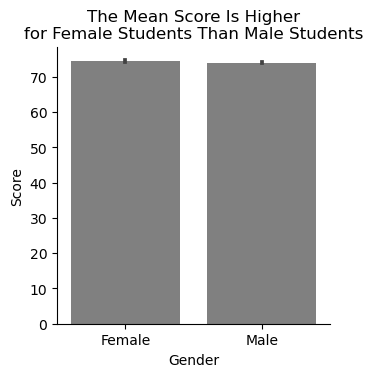

In [12]:
gen_comp = sns.catplot(data=st_merge, x="gender", y="score", kind="bar", aspect = 1, height = 3.5, color="gray")
gen_comp.set(xlabel="Gender", ylabel="Score")
gen_comp.set_xticklabels(["Female", "Male"])
plt.title("The Mean Score Is Higher\nfor Female Students Than Male Students")
plt.show()

In [13]:
fem_score = st_merge[st_merge["gender"]=="F"]["score"]
n_fem = len(fem_score)
sd_fem = np.std(fem_score)

mal_score = st_merge[st_merge["gender"]=="M"]["score"]
n_mal = len(mal_score)
sd_mal = np.std(mal_score)



gender_p = stats.ttest_ind(fem_score, mal_score, equal_var=False)[1]
print("p-value for gender difference in score: ", gender_p)

gen_mean_diff = np.mean(fem_score)-np.mean(mal_score)
gen_sd_pooled = np.sqrt(((n_fem-1)*(sd_fem**2) + (n_mal-1)*(sd_mal**2)) / (n_fem+n_mal-2))

gen_d = gen_mean_diff / gen_sd_pooled

print("Cohen's d-score for gender difference in score: ", gen_d)

p-value for gender difference in score:  0.000593479501375624
Cohen's d-score for gender difference in score:  0.02444336844470057


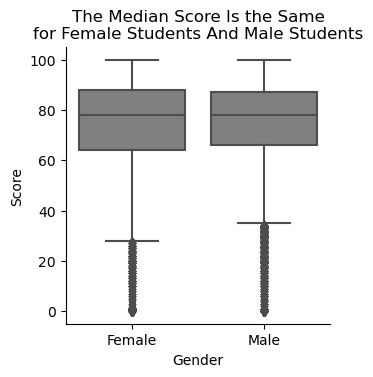

In [14]:
gen_box = sns.catplot(data=st_merge, x="gender", y="score", kind="box", aspect = 1,
                      height = 3.5, color="gray")
gen_box.set(xlabel="Gender", ylabel="Score")
gen_box.set_xticklabels(["Female", "Male"])
plt.title("The Median Score Is the Same\nfor Female Students And Male Students")
plt.show()